# Community Detection in Graphs
This session focuses on **community detection** in graphs — identifying clusters of nodes that are more densely connected internally than externally. We will explore key algorithms such as **Louvain**, **Label Propagation**, and **Girvan–Newman**, and understand the concept of **modularity** with code implementations in Python.

## What is a Community?
A **community** in a graph is a group of nodes with dense internal connections and sparser connections to the rest of the graph. Community detection helps uncover hidden structure in:
- Social networks (e.g., friend groups)
- Biological networks (e.g., protein complexes)
- Information networks (e.g., topic clusters in citation graphs)


## Modularity: A Measure of Community Quality
**Modularity** quantifies the quality of a particular division of a graph into communities. It compares the actual edge density inside communities with that expected in a random graph.

### Formula:

$$ Q = \frac{1}{2m} \sum_{i,j} \left[ A_{ij} - \frac{k_i k_j}{2m} \right] \delta(c_i, c_j) $$

Where:
- $ A_{ij}$: adjacency matrix
- $k_i, k_j$ : degrees of nodes \( i \) and \( j \)
- \( m \): total number of edges
- $\delta(c_i, c_j)$  : 1 if nodes \( i \) and \( j \) are in the same community, 0 otherwise

High modularity indicates dense intra-community edges and sparse inter-community edges.

## Louvain Method for Community Detection

The **Louvain method** is a greedy optimization algorithm designed to detect communities in a network by **maximizing modularity**. It is widely used because of its efficiency on large graphs.

### Algorithm Steps

1. **Initialization:**  
   Assign each node to its own community.

     ![Louvain1](figures/Louvain1.png)
   
   Each node in the graph is randomly assigned to a singleton community

2. **Local Optimization:**  
   Iteratively consider each node and move it to the community of its neighbor that **maximizes the increase in modularity**. Repeat until no further improvement is possible.

   ![Louvain2](figures/Louvain2.png)

   Nodes are assigned to communities based on their modularities

3. **Community Aggregation:**  
   Build a new network where each community becomes a single node, and edges between communities are weighted sums of the original edges.

   ![Louvain3](figures/Louvain3.png)
   
   Communities are reduced to a single node with weighted edges

4. **Repeat:**  
   Apply steps 2–3 iteratively on the aggregated network until modularity cannot be further increased.

---

### Intuition

- The algorithm seeks a partition where **most edges fall within communities** rather than between them.  
- The **greedy approach** ensures that modularity increases at each step, leading to a locally optimal solution.

---

## Advantages and Disadvantages of the Louvain Algorithm

**Advantages**

> High efficiency:
The Louvain algorithm is computationally efficient and can handle large networks with millions of nodes and edges.

> Hierarchical structure:
It produces a hierarchical (multi-level) community structure, allowing analysis at different levels of granularity.

> No need for predefining the number of communities:
Unlike methods such as k-means, Louvain automatically determines the optimal number of communities.

> Good modularity optimization:
It typically achieves high modularity scores, indicating well-separated and cohesive communities.

> Widely applicable:
Works on both weighted and unweighted, directed and undirected graphs.

**Disadvantages**

> Resolution limit problem:
It may fail to detect small communities within large networks due to modularity’s resolution limit.

> Randomness and instability:
The results can vary across runs because of random initialization or tie-breaking.

> Local maxima issue:
The greedy nature of the algorithm may lead to suboptimal solutions (local maxima of modularity).

> Difficult interpretation of hierarchical levels:
Choosing the most meaningful level in the hierarchy is sometimes ambiguous.

### Example

```python




Node 1: Dublin -> Community 0
Node 2: Paris -> Community 0
Node 3: Milan -> Community 0
Node 4: Rome -> Community 1
Node 5: Naples -> Community 1
Node 6: Moscow -> Community 1
Node 7: Tokyo -> Community 1


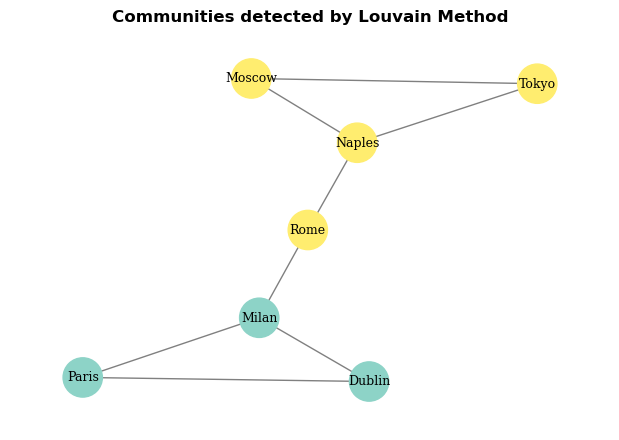

In [14]:
import matplotlib.pyplot as plt
import networkx as nx
from community import community_louvain

# --- Define Graph ---
G = nx.Graph()
G.add_edges_from([
    (1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)
])

# --- Node names ---
node_names = {
    1: "Dublin", 2: "Paris", 3: "Milan",
    4: "Rome", 5: "Naples", 6: "Moscow", 7: "Tokyo"
}

# --- Compute communities using Louvain method ---
partition = community_louvain.best_partition(G)

# --- Print community assignments ---
for node, comm in partition.items():
    print(f"Node {node}: {node_names[node]} -> Community {comm}")

# --- Prepare visualization ---
pos = nx.spring_layout(G, seed=42)
colors = [partition[n] for n in G.nodes()]

# --- Draw the graph ---
plt.figure(figsize=(6,4))
nx.draw(
    G, pos, 
    labels=node_names,
    with_labels=True,
    node_color=colors,
    cmap=plt.cm.Set3,
    node_size=800,
    edge_color='gray',
    font_size=9,
    font_family='serif'
)

plt.title("Communities detected by Louvain Method", fontsize=12, fontweight='bold')
plt.axis('off')
plt.margins(0.1)
plt.show()


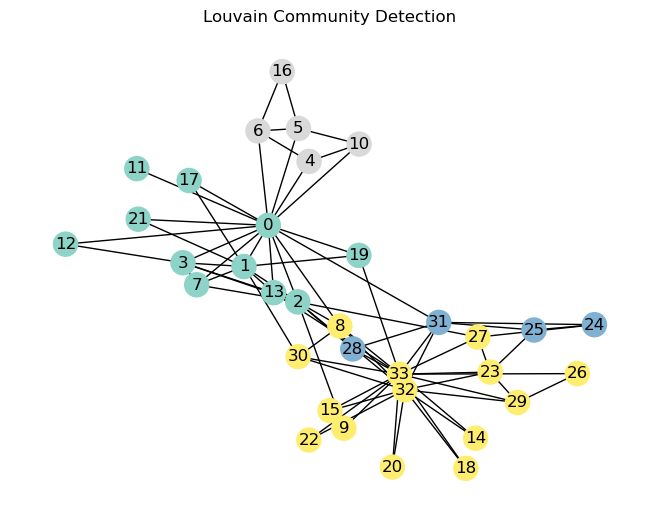

In [ ]:
### Example on Karate Club Graph:
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain  # pip install python-louvain

# Load the Karate Club Graph
G = nx.karate_club_graph()

# Apply Louvain method
partition = community_louvain.best_partition(G)

# Visualization
pos = nx.spring_layout(G, seed=42)
colors = [partition[n] for n in G.nodes()]
nx.draw(G, pos, node_color=colors, with_labels=True, cmap=plt.cm.Set3)
plt.title("Louvain Community Detection")
plt.show()

## Label Propagation Algorithm (LPA)

The **Label Propagation Algorithm (LPA)** is a fast and simple method for detecting communities in large networks.  
It relies on the idea that connected nodes are likely to share the same community label.  
The algorithm iteratively propagates labels across the network until a stable state is reached where most nodes share the same label as the majority of their neighbors.

### **Algorithm Steps**

1. **Initialization**  
   Assign a unique label to each node in the network.  
   Initially, every node forms its own community.

2. **Label Update**  
   For each node \( v \) (in random order), update its label to the one that appears most frequently among its neighbors.  
   Formally, if \( N(v) \) denotes the set of neighbors of \( v \):

   $$
   L_v = \arg\max_{l} \sum_{u \in N(v)} [L_u = l]
   $$

   where $L_u$ is the label of neighbor \( u \).

3. **Tie Breaking**  
   If there are multiple labels with the same highest frequency, one of them is chosen at random.

4. **Iteration**  
   Repeat the label update process for all nodes until the labels stop changing (convergence).  
   This typically happens within a few iterations.

5. **Output**  
   Nodes sharing the same label are grouped together as one community.

---

### **Characteristics**

- **Complexity:** \( O(|E|) \) — linear in the number of edges, making it very efficient for large networks.  
- **Convergence:** Usually fast, but not guaranteed to reach a unique global solution.  
- **Determinism:** Random node update order or tie-breaking can lead to different community partitions on different runs.

---

### **Advantages**

- Extremely fast and scalable.  
- Requires no prior knowledge of the number or size of communities.  
- Works well on large-scale social and information networks.

---

### **Limitations**

- Non-deterministic results due to random choices.  
- May produce one giant community if the graph is very dense.  
- Sensitive to network structure and update order.

---

### **Example 

## Label Propagation Algorithm (LPA) – Step by Step Example

We demonstrate LPA on a **small graph** with 6 nodes:

>Nodes: 1, 2, 3, 4, 5, 6

>Edges: (1-2), (1-3), (2-3), (3-4), (4-5), (5-6)

### Step 0: Initialization
Each node is assigned a **unique label**:

| Node | Label |
|------|-------|
| 1    | 1     |
| 2    | 2     |
| 3    | 3     |
| 4    | 4     |
| 5    | 5     |
| 6    | 6     |

---

### Step 1: First Iteration
- Node 1: neighbors = [2,3], labels = [2,3] → tie, pick randomly → label = 2  
- Node 2: neighbors = [1,3], labels = [2,3] → tie, pick randomly → label = 3  
- Node 3: neighbors = [1,2,4], labels = [2,3,4] → most frequent? tie → pick randomly → label = 2  
- Node 4: neighbors = [3,5], labels = [2,5] → tie → pick randomly → label = 5  
- Node 5: neighbors = [4,6], labels = [5,6] → tie → pick randomly → label = 5  
- Node 6: neighbors = [5], label = [5] → adopt 5

Updated labels:

| Node | Label |
|------|-------|
| 1    | 2     |
| 2    | 3     |
| 3    | 2     |
| 4    | 5     |
| 5    | 5     |
| 6    | 5     |

---

### Step 2: Second Iteration
- Node 1: neighbors = [2,3], labels = [3,2] → tie → pick randomly → label = 2  
- Node 2: neighbors = [1,3], labels = [2,2] → most frequent = 2 → label = 2  
- Node 3: neighbors = [1,2,4], labels = [2,2,5] → most frequent = 2 → label = 2  
- Node 4: neighbors = [3,5], labels = [2,5] → tie → pick randomly → label = 5  
- Node 5: neighbors = [4,6], labels = [5,5] → most frequent = 5 → label = 5  
- Node 6: neighbors = [5], label = [5] → adopt 5

Updated labels:

| Node | Label |
|------|-------|
| 1    | 2     |
| 2    | 2     |
| 3    | 2     |
| 4    | 5     |
| 5    | 5     |
| 6    | 5     |

---

### Step 3: Convergence
No more changes occur in labels.  
**Final communities:**

- Community 1 (label 2): nodes = [1,2,3]  
- Community 2 (label 5): nodes = [4,5,6]


Community 1: [0, 1, 3, 4, 7, 10, 11, 12, 13, 17, 19, 21, 24, 25, 31]
Community 2: [2, 8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 28, 29, 30, 32, 33]
Community 3: [5, 6, 16]


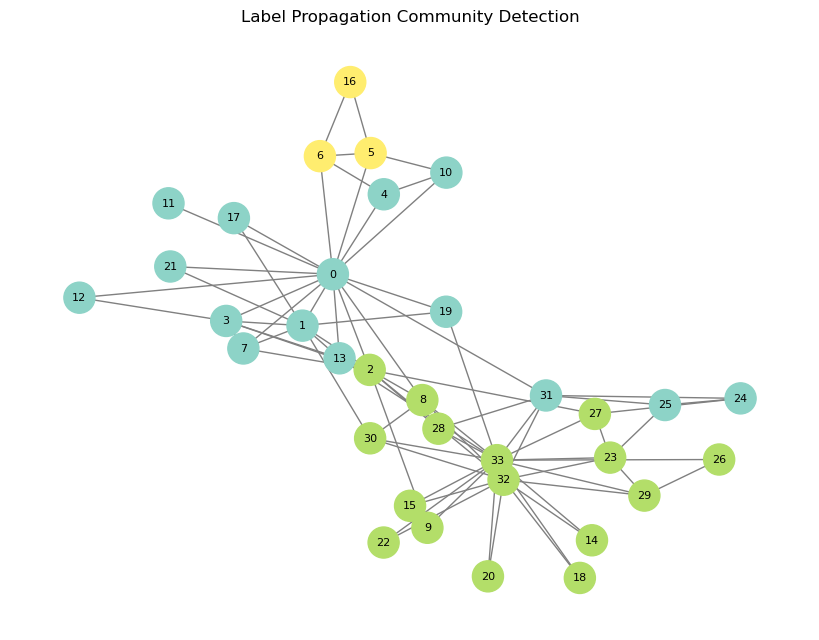

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample graph
G = nx.karate_club_graph()

# Apply Label Propagation
communities = list(nx.community.label_propagation_communities(G))

# Assign a color to each community
color_map = {}
for idx, comm in enumerate(communities):
    for node in comm:
        color_map[node] = idx

colors = [color_map[n] for n in G.nodes()]

# Display communities
for i, comm in enumerate(communities):
    print(f"Community {i+1}: {sorted(comm)}")

# Visualization
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8,6))
nx.draw(
    G, pos, node_color=colors, cmap=plt.cm.Set3,
    with_labels=True, node_size=500, edge_color='gray', font_size=8
)
plt.title("Label Propagation Community Detection")
plt.axis('off')
plt.show()


## Girvan–Newman Algorithm

The **Girvan–Newman Algorithm** is a **divisive method** for detecting communities in networks.  
It identifies edges that are most "between" communities (edges with high **betweenness centrality**) and removes them iteratively, causing the network to break down into distinct communities.

---

### **Algorithm Steps**

1. **Compute Edge Betweenness**
   - Calculate the **betweenness centrality** for all edges in the network.  
   - Edges that occur on many shortest paths have higher betweenness.

2. **Remove Edge**
   - Remove the edge with the **highest betweenness**.  
   - If multiple edges have the same highest value, remove one at random or all of them.

3. **Recompute Betweenness**
   - After removing an edge, recalculate betweenness centrality for all remaining edges.  
   - This ensures that the centrality reflects the current network structure.

4. **Repeat**
   - Repeat steps 2–3 until the network splits into the desired number of communities or all edges are removed.

5. **Output**
   - Each connected component in the resulting network represents a **community**.

---

### **Characteristics**

- **Type:** Divisive (top-down) community detection  
- **Complexity:** $O(|V||E|^2)$ — computationally expensive for large networks  
- **Determinism:** Deterministic if ties in betweenness are resolved consistently

---

### **Advantages**

- Conceptually simple and interpretable  
- Produces hierarchical community structure  
- Useful for small to medium-sized networks

---

### **Limitations**

- Computationally expensive for large networks  
- Sensitive to network noise and small changes  
- Not suitable for very dense or very large graphs

---

### **Python **

Communities: ([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])


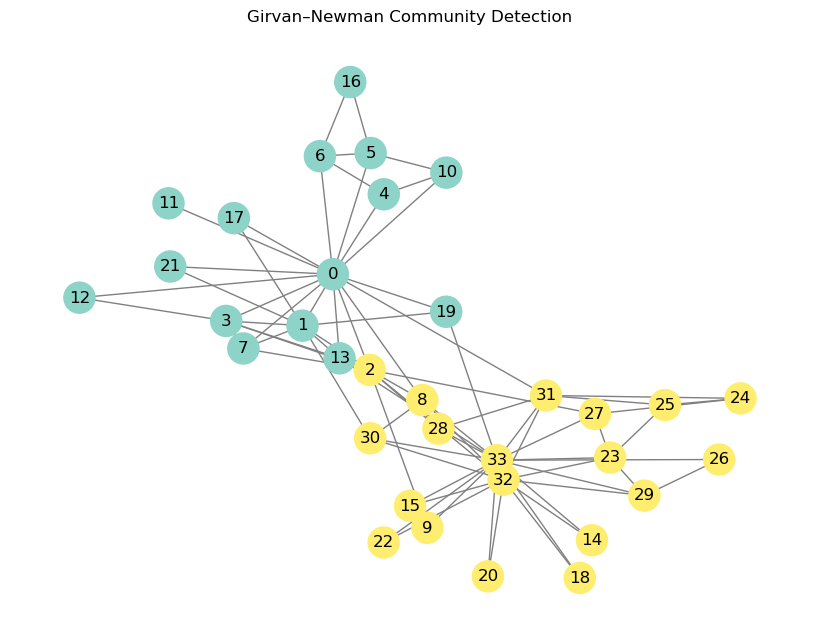

: 

In [ ]:
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt

# Example graph
G = nx.karate_club_graph()

# Apply Girvan-Newman algorithm
comp = community.girvan_newman(G)

# Extract the first level of communities (two communities)
first_level_communities = tuple(sorted(c) for c in next(comp))
print("Communities:", first_level_communities)

# Assign colors for visualization
color_map = {}
for idx, comm in enumerate(first_level_communities):
    for node in comm:
        color_map[node] = idx
colors = [color_map[n] for n in G.nodes()]

# Draw the graph
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8,6))
nx.draw(
    G, pos, node_color=colors, cmap=plt.cm.Set3,
    with_labels=True, node_size=500, edge_color='gray'
)
plt.title("Girvan–Newman Community Detection")
plt.axis('off')
plt.show()

## 📝 Practice
Generate a synthetic graph using the **Barabási–Albert** model and apply all three community detection methods. Compare the number of detected communities and visualize them.

### Starter Code:
```python
G_ba = nx.barabasi_albert_graph(20, 2)
# Try Louvain, LPA, and Girvan–Newman on this graph
```